In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
  
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

In [ ]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0],color = "#1D8EF5")
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1],color = "#33AAFF", edgecolor="#1D1EA2")
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linestyle='--',linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linestyle='--',linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linestyle='--',linewidth=2.2, label='mode='+ str(np.round(df[col].mode()[0],1)) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

In [ ]:
data = pd.read_csv('/content/bank.csv')

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
data['day'] = data['day'].astype(object)

In [ ]:
data=data.drop('duration', axis=1)

In [ ]:
data_clean = data.copy()

In [ ]:
data_clean.describe()

,age,balance,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,2.508421,51.330407,0.832557
std,11.913369,3225.413326,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,63.000000,854.000000,58.000000


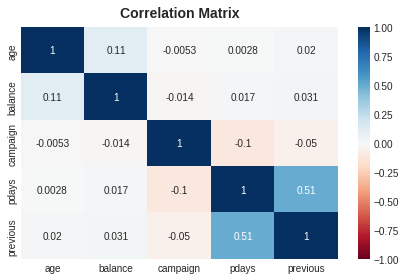

In [ ]:
sns.heatmap(data.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Age Analysis

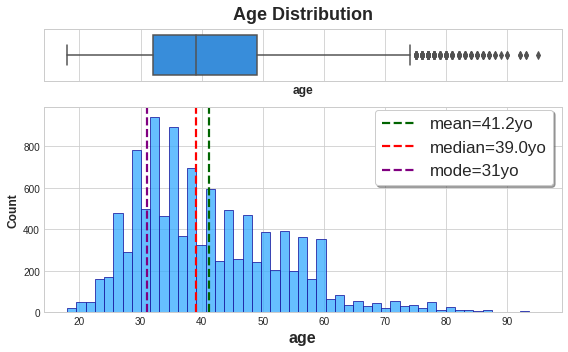

In [ ]:
num_plot(data_clean, 'age', 'Age Distribution', 'yo')

Balance Analysis

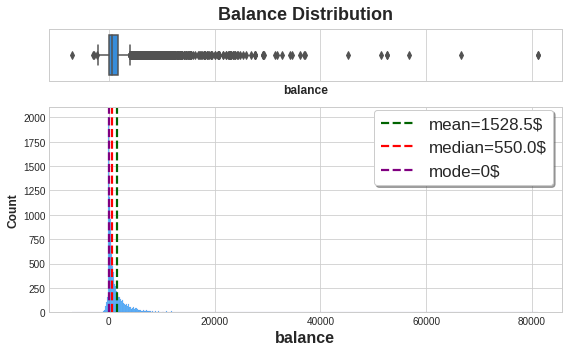

In [ ]:
num_plot(data_clean, 'balance', 'Balance Distribution', '$')

Campaign Analysis

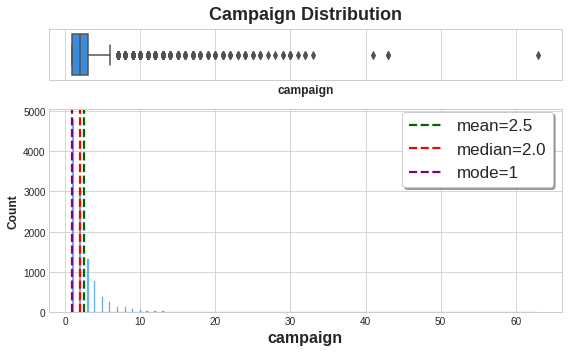

In [ ]:
num_plot(data_clean, 'campaign', 'Campaign Distribution', '')

pdays Analysis

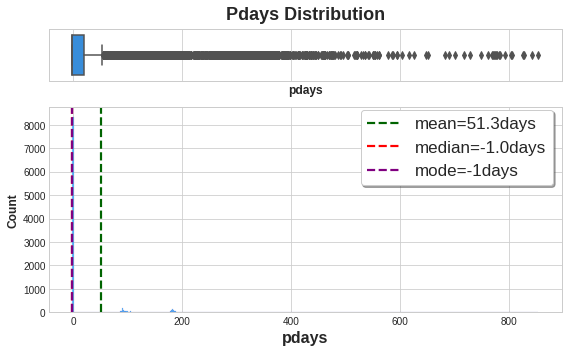

In [ ]:
num_plot(data_clean, 'pdays', 'Pdays Distribution', 'days')

In [ ]:
data_clean['new_cust'] = data_clean['pdays'] == -1

In [ ]:
data_clean['new_cust'] = data_clean['new_cust'].map({False:0, True:1})

Exploratory Data Analysis

In [ ]:
data=data_clean

In [ ]:
palette = {'yes':'#00A5E3', 'no':'#FF0000'}

Balance of Dataset

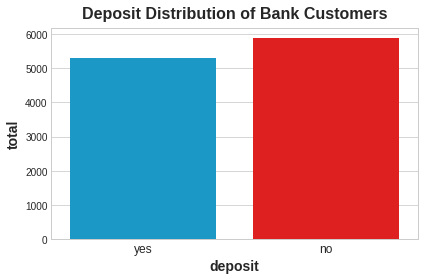

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x ='deposit', data = data, palette = palette)
plt.title('Deposit Distribution of Bank Customers', fontsize = 16)
plt.xlabel('deposit', fontsize = 14)
plt.ylabel('total', fontsize = 14)
plt.xticks(fontsize = 12)

plt.show()

Job vs Deposit

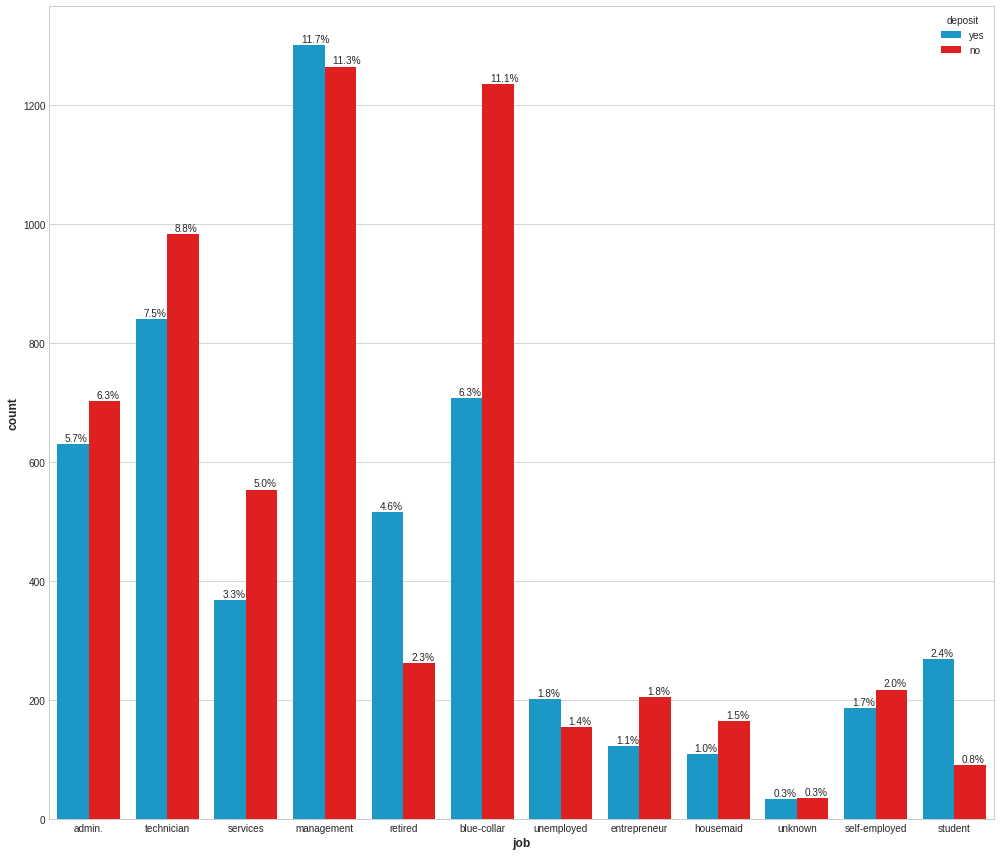

In [ ]:
plt.figure(figsize = (14,12))
total = len(data["job"])
ax = sns.countplot(x = 'job', data = data, hue = 'deposit', palette = palette)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

Marital Status vs Campaign Success

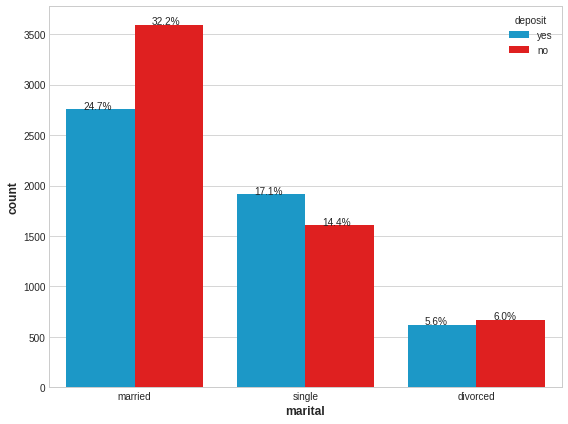

In [ ]:
plt.figure(figsize = (8,6))
total = len(data["marital"])
ax = sns.countplot(x = 'marital', data = data, hue = 'deposit', palette = palette)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

Education vs Campaign Success

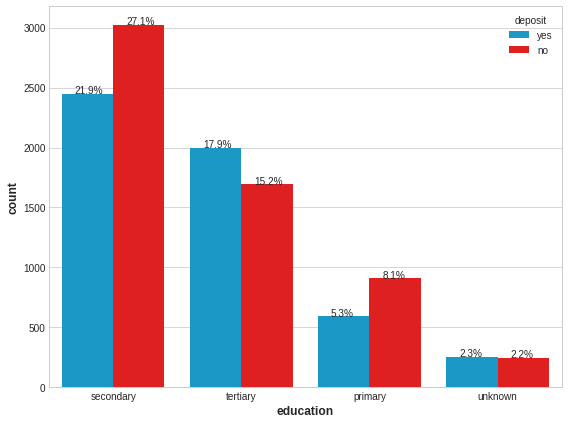

In [ ]:
plt.figure(figsize = (8,6))
total = len(data["education"])
ax = sns.countplot(x = 'education', data = data, hue = 'deposit', palette = palette)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

Default vs Campaign Success

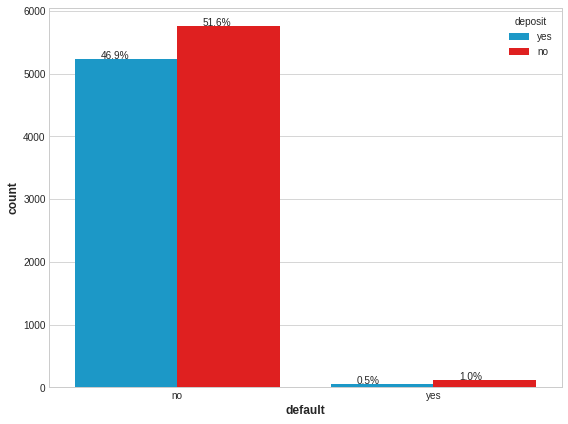

In [ ]:
plt.figure(figsize = (8,6))
total = len(data["default"])
sns.set_palette("Paired")
ax = sns.countplot(x = 'default', data = data, hue = 'deposit', palette= palette)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

Loan vs Campaign Success

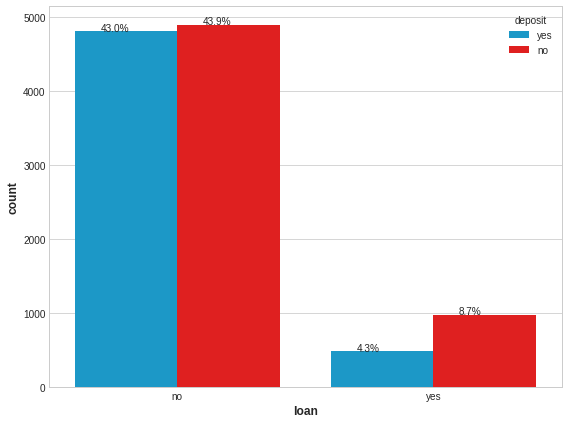

In [ ]:
plt.figure(figsize = (8,6))
total = len(data["loan"])
ax = sns.countplot(x = 'loan', data = data, hue = 'deposit', palette = palette)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

Contact vs Campaign Success

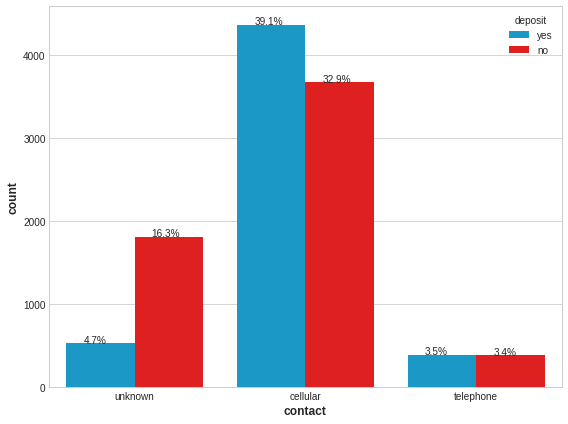

In [ ]:
plt.figure(figsize = (8,6))
total = len(data["contact"])
ax = sns.countplot(x = 'contact', data = data, hue = 'deposit', palette = palette)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

Housing vs Campaign Success

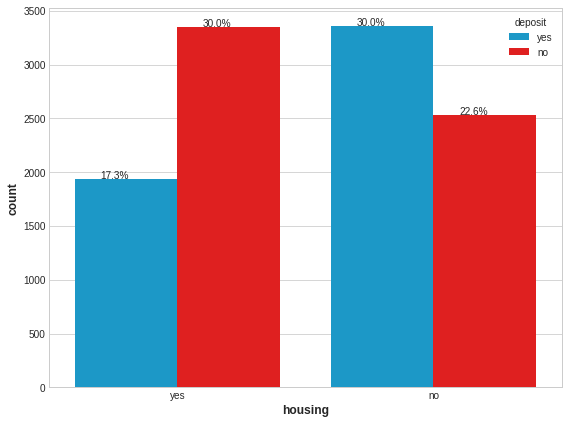

In [ ]:
plt.figure(figsize = (8,6))
total = len(data["housing"])
ax = sns.countplot(x = 'housing', data = data, hue = 'deposit', palette = palette)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

Day vs Campaign Success

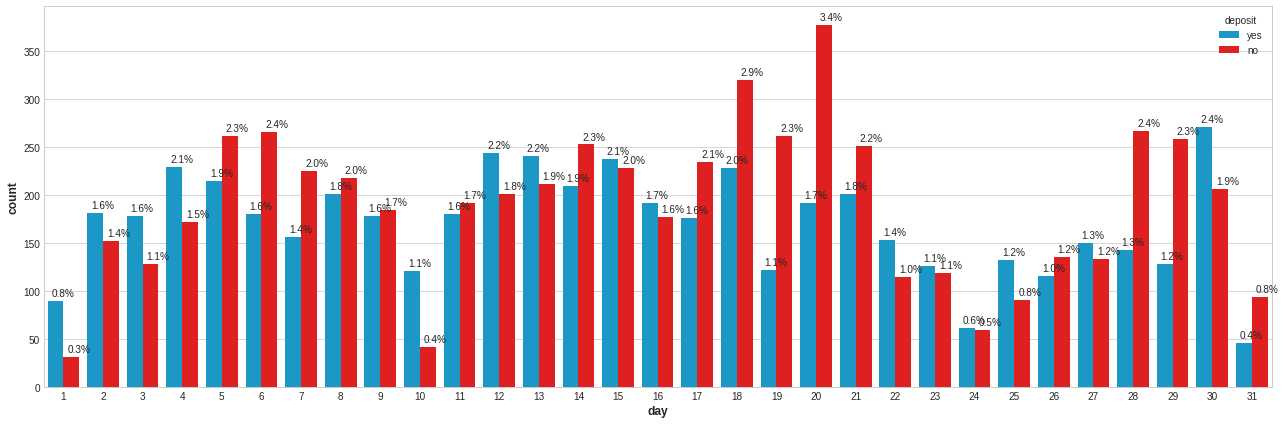

In [ ]:
plt.figure(figsize = (18,6))
total = len(data["day"])
ax = sns.countplot(x = 'day', data = data, hue = 'deposit', palette = palette)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

Month vs Campaign Success

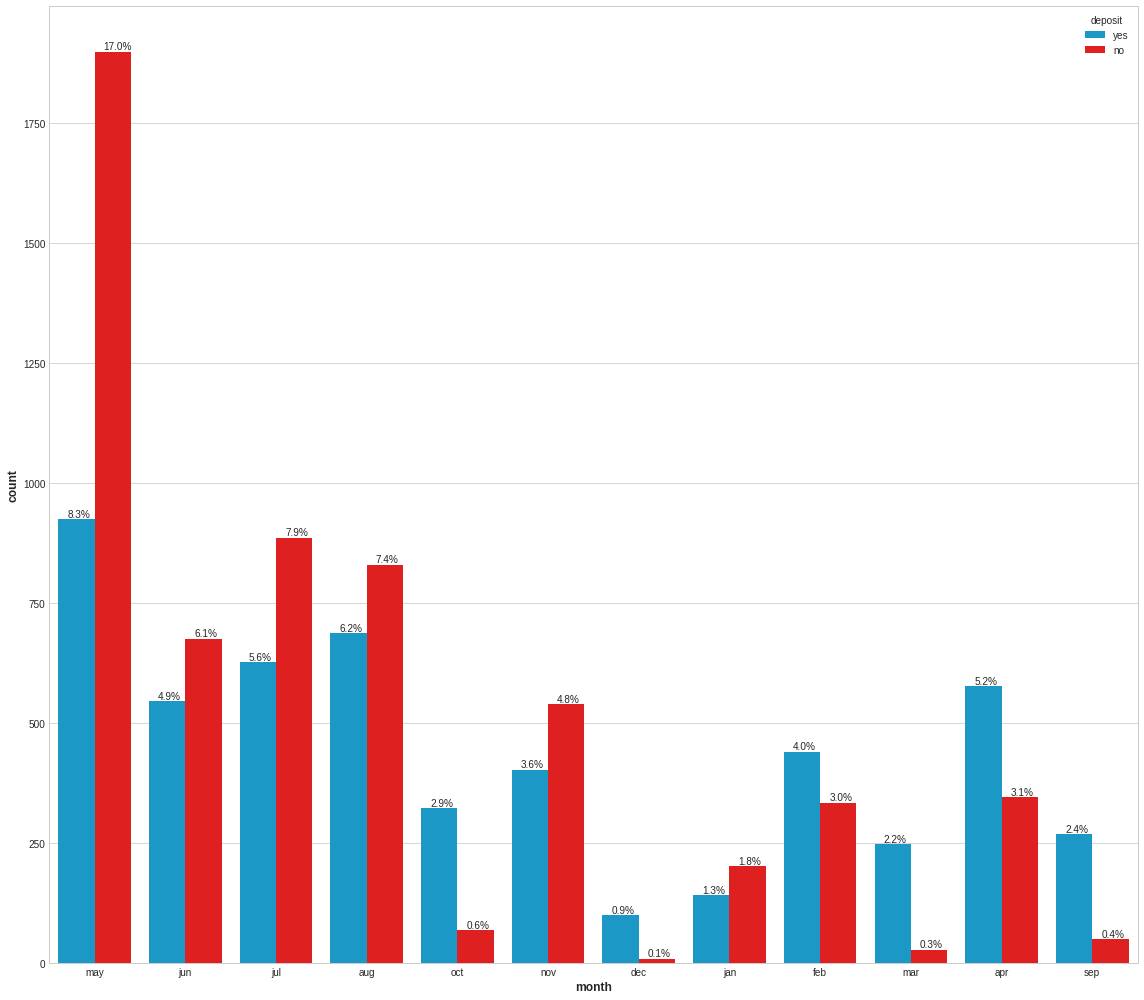

In [ ]:
plt.figure(figsize = (16,14))
total = len(data["month"])
ax = sns.countplot(x = 'month', data = data, hue = 'deposit', palette=palette)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

Poutcome vs Campaign Success

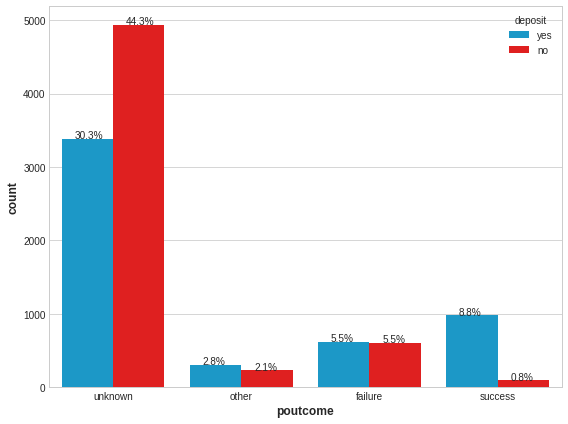

In [ ]:
plt.figure(figsize = (8,6))
total = len(data["poutcome"])
ax = sns.countplot(x = 'poutcome', data = data, hue = 'deposit', palette=palette)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

New_cust VS Campaign Success

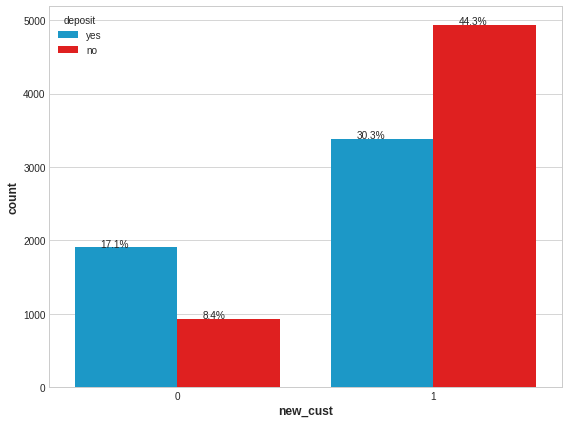

In [ ]:
plt.figure(figsize = (8,6))
total = len(data["new_cust"])
ax = sns.countplot(x = 'new_cust', data = data, hue = 'deposit', palette = palette)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
plt.show()

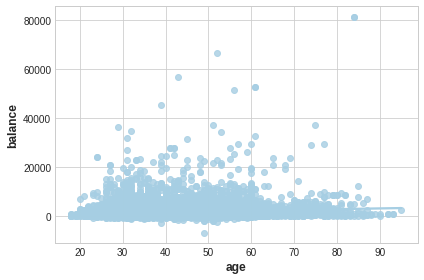

In [ ]:
sns.regplot(x='age',y='balance', data=data)
plt.show()

In [ ]:
data['age_cate'] = pd.cut(data['age'], bins=[0, 35, 55, 70, float('Inf')], labels=['0-35', '35-55', '55-70', '70-95'])

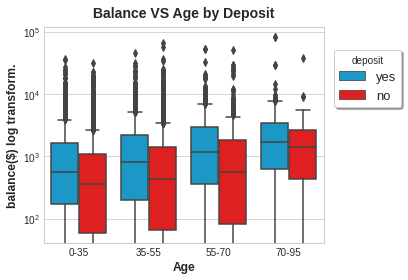

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='age_cate', y='balance', hue='deposit', data=data, palette=palette)
plt.ylabel('balance($) log transform.')
plt.xlabel('Age')
plt.title('Balance VS Age by Deposit')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.3, 0.6), title='deposit', loc = 'lower right', fontsize=13, fancybox=True, shadow=True, frameon=True)
plt.show()

Data Preparation for ML algorithms

In [ ]:
data_clean = data_clean.replace(['yes','no'], [1,0])

In [ ]:
cat_feat = data_clean.select_dtypes(include="object").columns

In [ ]:
cat_feat

Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')

Job

In [ ]:
data_clean['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

Age Cate

In [ ]:
data_clean['age_cate'].value_counts()

35-55    5307
0-35     4371
55-70    1211
70-95     273
Name: age_cate, dtype: int64

In [ ]:
data_clean['age_cate'] = data_clean['age_cate'].map({'0-35':0,'35-55':1,'55-70':2,'70-95':3})

Marital Status

In [ ]:
data_clean['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [ ]:
data_clean['marital'] = data_clean['marital'].map({'single':0,'married':1,'divorced':2})

Education

In [ ]:
data_clean['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [ ]:
data_clean['education'] = data_clean['education'].map({'primary':0,'secondary':1,'tertiary':2, 'unknown':3})

Contact

In [ ]:
data_clean['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [ ]:
data_clean['contact'] = data_clean['contact'].map({'telephone':0,'cellular':1, 'unknown':3})

Month

In [ ]:
data_clean['month'].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [ ]:
data_clean['month'] = data_clean['month'].map({'jan':0,'feb':1,'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})

Poutcome

In [ ]:
data_clean['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [ ]:
data_clean = data_clean[data_clean['poutcome']!='other']

In [ ]:
data_clean.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
new_cust     0
age_cate     0
dtype: int64

In [ ]:
encoded_data = pd.get_dummies(data_clean, drop_first=True)

In [ ]:
X = encoded_data.drop('deposit', axis=1)
y = encoded_data['deposit']

Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7437, 30)
(3188, 30)
(7437,)
(3188,)


In [ ]:
np.random.seed(123)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
rf1=RandomForestClassifier()
rf1.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rf1.predict(X_test)
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.70      0.80      0.75      1683
         Yes       0.74      0.62      0.67      1505

    accuracy                           0.72      3188
   macro avg       0.72      0.71      0.71      3188
weighted avg       0.72      0.72      0.71      3188



In [ ]:
params={'n_estimators':(100,200,400,800),'max_features':('auto',16//3)}
rf1a=RandomForestClassifier()
gs=GridSearchCV(rf1a,params)
gs.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ('auto', 5),
                         'n_estimators': (100, 200, 400, 800)})

In [ ]:
gs.cv_results_

{'mean_fit_time': array([0.99989433, 1.6572258 , 3.29452448, 6.71523609, 0.83492546,
        1.72628546, 3.7957747 , 6.85740023]),
 'mean_score_time': array([0.06115899, 0.11721249, 0.22892756, 0.47999816, 0.060885  ,
        0.12302337, 0.28039842, 0.4883698 ]),
 'mean_test_score': array([0.7234115 , 0.72690748, 0.72596662, 0.72636921, 0.723278  ,
        0.72744557, 0.72314205, 0.72636921]),
 'param_max_features': masked_array(data=['auto', 'auto', 'auto', 'auto', 5, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 200, 400, 800, 100, 200, 400, 800],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 'auto', 'n_estimators': 100},
  {'max_features': 'auto', 'n_estimators': 200},
  {'max_features': 'auto', 'n_estimators': 400},
  {'max_features':

In [ ]:
gs.best_estimator_

RandomForestClassifier(max_features=5, n_estimators=200)

In [ ]:
rf1b=RandomForestClassifier(max_features=5, n_estimators=200)
rf1b.fit(X_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=200)

In [ ]:
y_pred=rf1b.predict(X_test)
print(classification_report(y_test,y_pred,target_names = ['No','Yes']))

              precision    recall  f1-score   support

          No       0.71      0.80      0.75      1683
         Yes       0.74      0.64      0.68      1505

    accuracy                           0.72      3188
   macro avg       0.72      0.72      0.72      3188
weighted avg       0.72      0.72      0.72      3188



Result

In [ ]:
feature_importances = pd.DataFrame(rf1b.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance',ascending=False)

In [ ]:
feature_importances

,importance
balance,0.165760
age,0.132366
day,0.129385
month,0.092111
campaign,0.068323
contact,0.046685
education,0.039277
pdays,0.038783
poutcome_success,0.038471
marital,0.034425


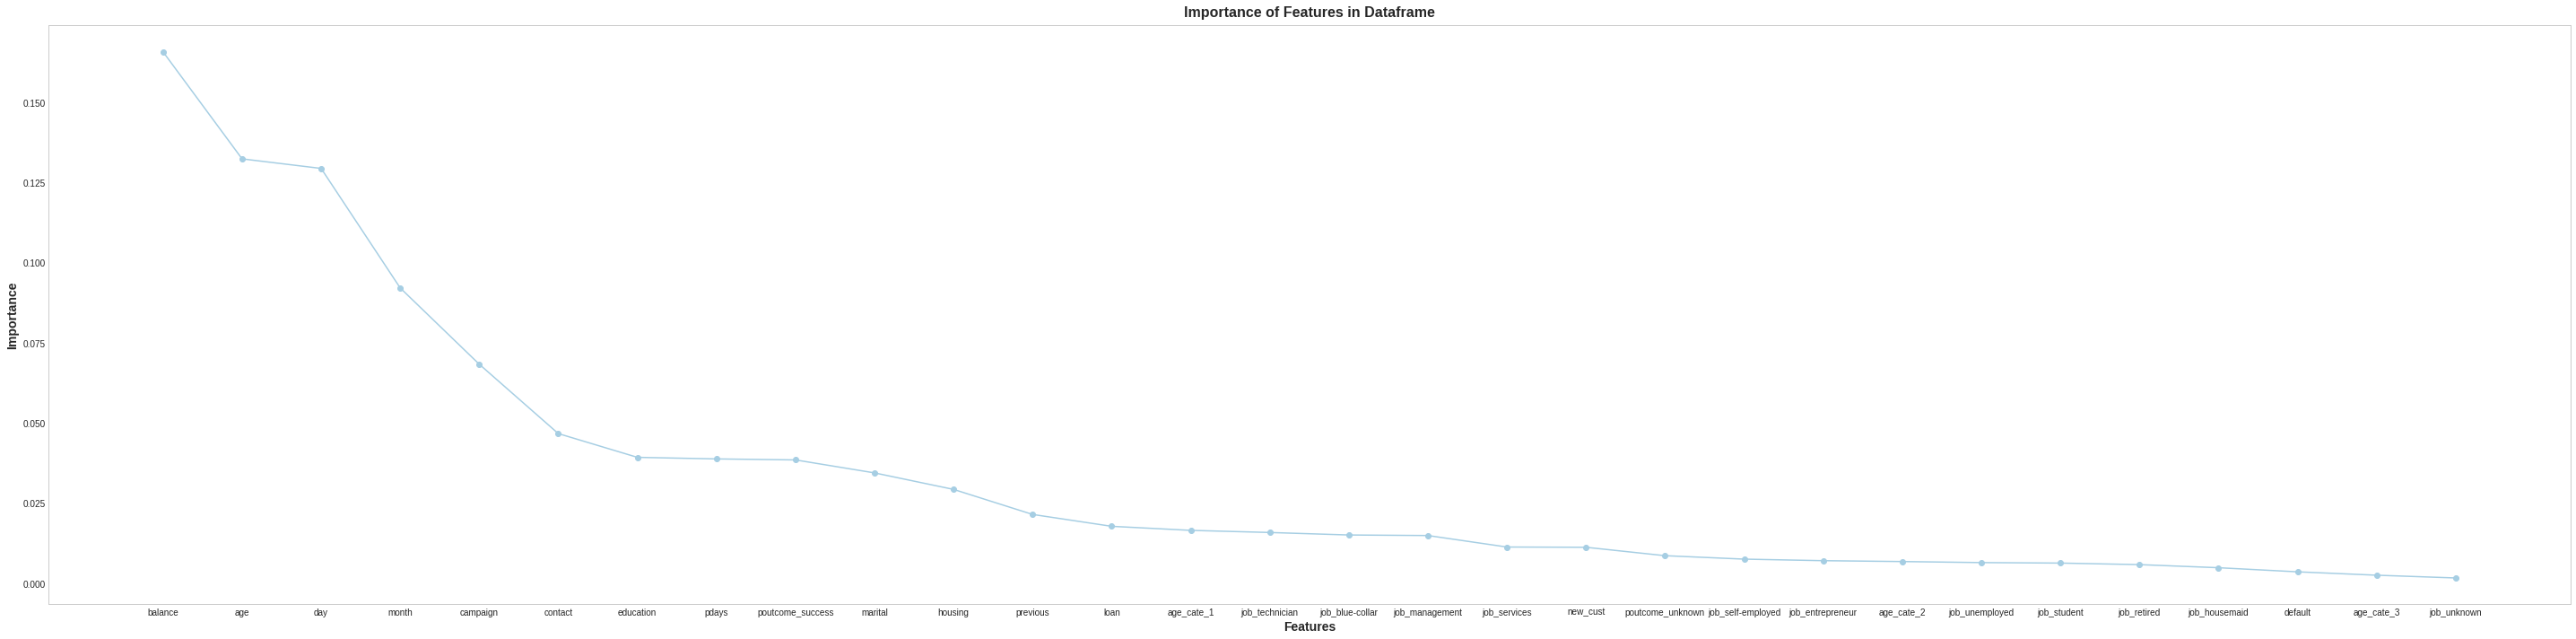

In [ ]:
plt.figure(figsize=(40,10))
plt.plot(feature_importances)
plt.scatter(y=feature_importances.importance,x=feature_importances.index)
plt.title('Importance of Features in Dataframe', fontsize = 16)
plt.ylabel('Importance', fontsize=14)
plt.xlabel('Features', fontsize = 14)
plt.grid()
plt.show()

(-1.0, 30.0)

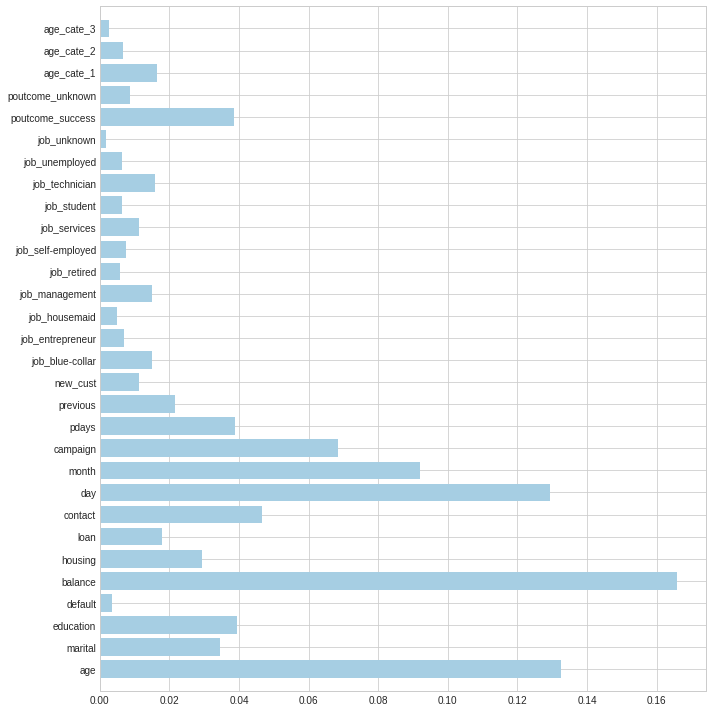

In [ ]:
plt.figure(figsize=(10,10))
nfeat=X.shape[1]
plt.barh(np.arange(nfeat),rf1b.feature_importances_,align='center')
plt.yticks(np.arange(nfeat),list(X.columns))
plt.ylim(-1,nfeat)